Jakub Malkowski 245870

## Analizowane dane: Przewidywanie porzucenia studiów i sukcesów akademickich 
## (Predict Students' Dropout and Academic Success)

Zbiór danych dotyczy studentów różnych kierunków studiów, zawiera informacje o ich ścieżce edukacyjnej i wynikach na początku studiów. Służy do przewidywania porzucenia studiów i sukcesów akademickich przy użyciu modeli klasyfikacyjnych.

### Dział 1
1.a Opis danych i przedstawienie zbiorów danych 

## Pozyskiwanie danych

Zbiór danych został stworzony w ramach projektu mającego na celu zmniejszenie liczby porzuceń i niepowodzeń akademickich w szkolnictwie wyższym, poprzez wykorzystanie technik uczenia maszynowego do wczesnego identyfikowania studentów zagrożonych, aby wdrożyć strategie wsparcia. 

Dane zawierają informacje dostępne w momencie rekrutacji: ścieżkę akademicką, dane demograficzne i czynniki społeczno-ekonomiczne.

Problem jest sformułowany jako zadanie klasyfikacji trzech kategorii: porzucenie studiów, kontynuowanie nauki, ukończenie studiów, na koniec normalnego czasu trwania kursu.

1.b Załadowanie potrzebnych bibliotek

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'pandas'

1.c Ładowanie zbioru danych

In [7]:
df = pd.read_excel('data.xlsx')
df.head()

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                      12  ...                                    0   
1                       3  ...                                    0   
2                      37  ...                                    0   
3                      37  ...                                    0   
4                      38  ...                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    0   
1                                    6   
2                                    6   
3                                    6   
4                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

### Dział 2
2.a statystyka opisowa

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

1. **Marital status**: Stan cywilny studenta (liczba całkowita, reprezentująca kategorie).

    Znaczenia danych wartości
   
    1 – singiel
    2 – żonaty/zamężna
    3 – wdowiec/wdowa
    4 – rozwiedziony/a
    5 – związek nieformalny
    6 – separacja prawna
2. **Application mode**: Tryb aplikacji na studia (np. online, osobiście).
    
    Znaczenia danych wartości

    1 - 1. faza - kontyngent ogólny
    2 - Rozporządzenie nr 612/93
    5 - 1. faza - kontyngent specjalny (Wyspy Azory)
    7 - Posiadacze innych dyplomów wyższego wykształcenia
    10 - Rozporządzenie nr 854-B/99
    15 - Student międzynarodowy (licencjat)
    16 - 1. faza - kontyngent specjalny (Wyspa Madera)
    17 - 2. faza - kontyngent ogólny
    18 - 3. faza - kontyngent ogólny
    26 - Rozporządzenie nr 533-A/99, punkt b2) (Inny Plan)
    27 - Rozporządzenie nr 533-A/99, punkt b3 (Inna Instytucja)
    39 - Osoby powyżej 23 roku życia
    42 - Transfer
    43 - Zmiana kierunku studiów
    44 - Posiadacze dyplomów specjalizacji technologicznej
    51 - Zmiana instytucji/kierunku studiów
    53 - Posiadacze dyplomów krótkiego cyklu
    57 - Zmiana instytucji/kierunku studiów (Międzynarodowi)
3. **Application order**: Kolejność aplikacji (numer porządkowy aplikacji).
4. **Course**: Kod kierunku studiów.

    Znaczenia danych wartości    

    33 - Technologie Produkcji Biopaliw
    171 - Animacja i Projektowanie Multimedialne
    8014 - Praca Socjalna (studia wieczorowe)
    9003 - Agronomia
    9070 - Projektowanie Komunikacji
    9085 - Pielęgniarstwo Weterynaryjne
    9119 - Inżynieria Informatyczna
    9130 - Hipologia i Jeździectwo
    9147 - Zarządzanie
    9238 - Praca Socjalna
    9254 - Turystyka
    9500 - Pielęgniarstwo
    9556 - Higiena Jamy Ustnej
    9670 - Zarządzanie Reklamą i Marketingiem
    9773 - Dziennikarstwo i Komunikacja
    9853 - Edukacja Podstawowa
    9991 - Zarządzanie (studia wieczorowe)
5. **Daytime/evening attendance**: Tryb nauczania (dzienne/wieczorowe).

    Znaczenia danych wartości  

    1 – dzienne
    0 – wieczorowe
6. **Previous qualification**: Typ wcześniejszego wykształcenia.

    Znaczenia danych wartości      

    1 - Wykształcenie średnie
    2 - Wyższe wykształcenie - licencjat
    3 - Wyższe wykształcenie - stopień
    4 - Wyższe wykształcenie - magister
    5 - Wyższe wykształcenie - doktorat
    6 - Uczęszczanie do szkoły wyższej
    9 - 12. klasa szkoły średniej - nieukończona
    10 - 11. klasa szkoły średniej - nieukończona
    12 - Inne - 11. klasa szkoły średniej
    14 - 10. klasa szkoły średniej
    15 - 10. klasa szkoły średniej - nieukończona
    19 - Edukacja podstawowa 3. stopnia (9./10./11. klasa) lub równoważna
    38 - Edukacja podstawowa 2. stopnia (6./7./8. klasa) lub równoważna
    39 - Kurs specjalizacji technologicznej
    40 - Wyższe wykształcenie - stopień (1. cykl)
    42 - Profesjonalny wyższy kurs techniczny
    43 - Wyższe wykształcenie - magister (2. cykl)
7. **Previous qualification (grade)**: Ocena uzyskana w poprzednim wykształceniu.
8. **Nationality**: Kategoria narodowościowa studenta.

    Znaczenia danych wartości

    1 - Portugalski
    2 - Niemiecki
    6 - Hiszpański
    11 - Włoski
    13 - Holenderski
    14 - Angielski
    17 - Litewski
    21 - Angolski
    22 - Zielonoprzylądkowy
    24 - Gwinejski
    25 - Mozambicki
    26 - Wysp Świętego Tomasza i Książęcej
    32 - Turecki
    41 - Brazylijski
    62 - Rumuński
    100 - Mołdawski (Republika Mołdowy)
    101 - Meksykański
    103 - Ukraiński
    105 - Rosyjski
    108 - Kubański
    109 - Kolumbijski
9. **Mother's qualification**: Wykształcenie matki.

    każda liczba odpowiada kwalifikacja
10. **Father's qualification**: Wykształcenie ojca.

    każda liczba odpowiada kwalifikacja
11. **Mother's occupation**: Zawód matki.

    każda liczba odpowiad zawód
12. **Father's occupation**: Zawód ojca.

    każda liczba odpowiad zawód
13. **Admission grade**: Ocena przyjęcia na studia.
14. **Displaced**: Status studenta związany z byciem przesiedlonym (tak/nie).
15. **Educational special needs**: Specjalne potrzeby edukacyjne studenta (tak/nie).
16. **Debtor**: Status zadłużenia studenta (tak/nie).
17. **Tuition fees up to date**: Aktualność opłat za studia.
18. **Gender**: Płeć studenta.

    Znaczenia danych wartości

    1 – male 0 – female
19. **Scholarship holder**: Status posiadacza stypendium.
20. **Age at enrollment**: Wiek studenta w momencie rekrutacji.
21. **International**: Status międzynarodowy studenta (tak/nie).
22. **Curricular units 1st sem (credited)**: Liczba przedmiotów uznanych w pierwszym semestrze.
23. **Curricular units 1st sem (enrolled)**: Liczba przedmiotów zapisanych w pierwszym semestrze.
24. **Curricular units 1st sem (evaluations)**: Liczba ocen w pierwszym semestrze.
25. **Curricular units 1st sem (approved)**: Liczba przedmiotów zatwierdzonych w pierwszym semestrze.
26. **Curricular units 1st sem (grade)**: Średnia ocena z przedmiotów w pierwszym semestrze.
27. **Curricular units 1st sem (without evaluations)**: Liczba przedmiotów bez ocen w pierwszym semestrze.
28. **Curricular units 2nd sem (credited)**: Liczba przedmiotów uznanych w drugim semestrze.
29. **Curricular units 2nd sem (enrolled)**: Liczba przedmiotów zapisanych w drugim semestrze.
30. **Curricular units 2nd sem (evaluations)**: Liczba ocen w drugim semestrze.
31. **Curricular units 2nd sem (approved)**: Liczba przedmiotów zatwierdzonych w drugim semestrze.
32. **Curricular units 2nd sem (grade)**: Średnia ocena z przedmiotów w drugim semestrze.
33. **Curricular units 2nd sem (without evaluations)**: Liczba przedmiotów bez ocen w drugim semestrze.
34. **Unemployment rate**: Stopa bezrobocia w kraju/strefie w danym okresie.
35. **Inflation rate**: Stopa inflacji w kraju/strefie w danym okresie.
36. **GDP**: Produkt krajowy brutto w danym okresie.
37. **Target**: Cel (klasa docelowa), który klasyfikuje studentów do jednej z trzech kategorii: porzucenie studiów, kontynuowanie studiów, ukończenie studiów.

2.b Wizualizacje danych

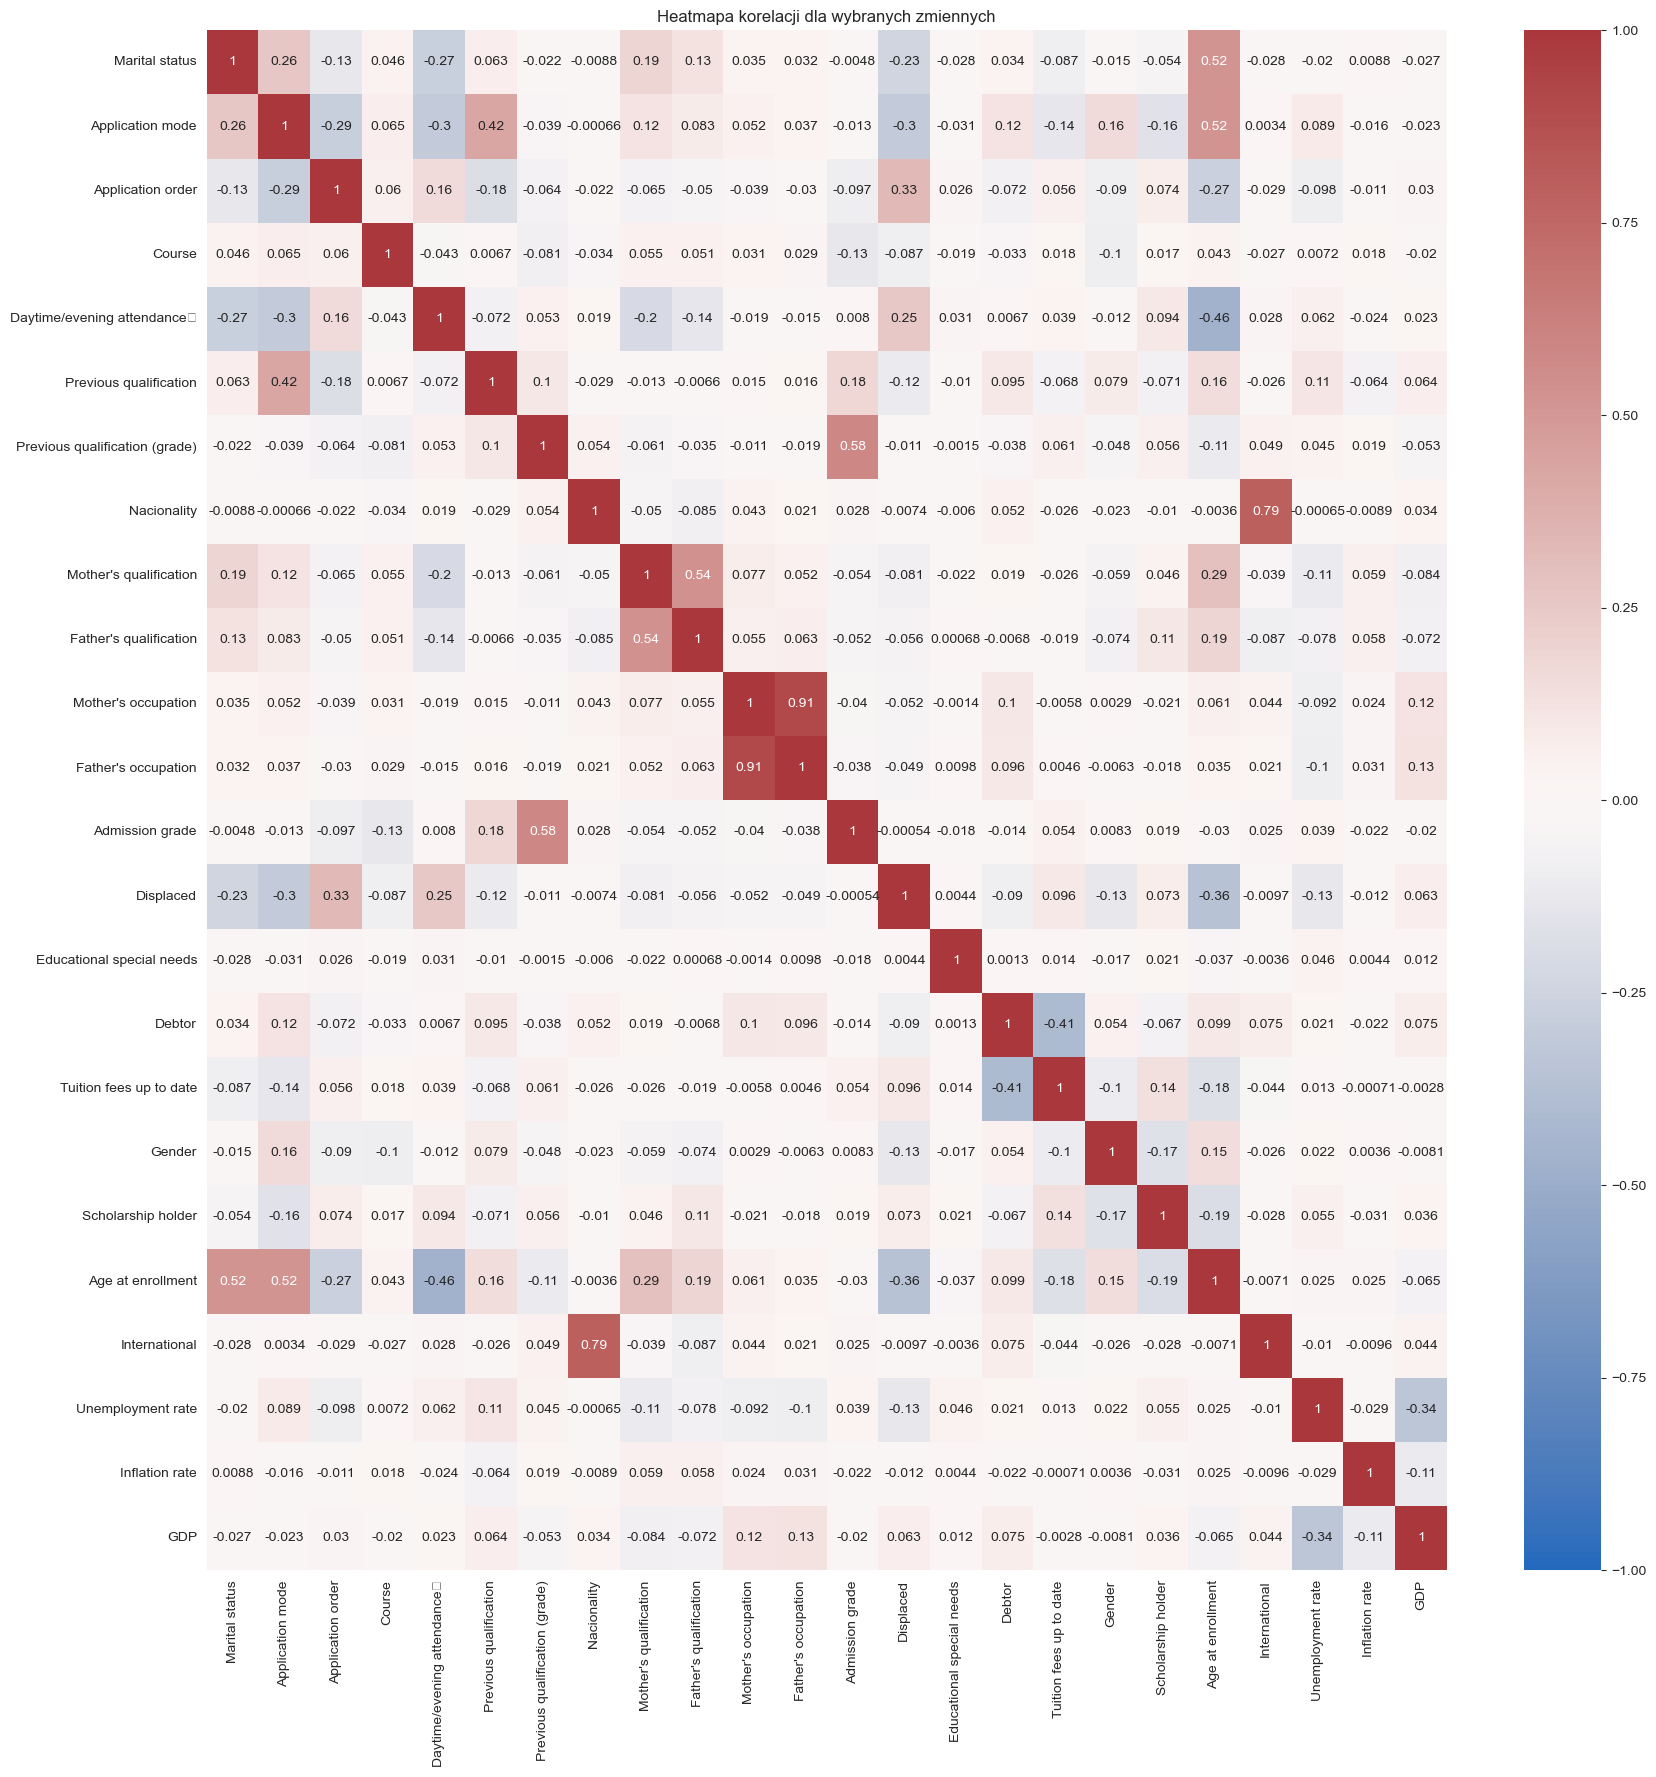

In [9]:
df1 = df.drop(columns=[
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
])
df_numeric = df1.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 20))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap="vlag")
plt.title("Heatmapa korelacji dla wybranych zmiennych")
plt.show()

# Największy poziom skorelowania:

1. **Zawód matki i ojca (0.91)**: Bardzo silna dodatnia korelacja między zawodem matki a zawodem ojca.
2. **Kraj z międzynarodowością (0.79)**: Silna dodatnia korelacja między narodowością a statusem międzynarodowym studenta.
3. **Ocena z poprzedniego wykształcenia a ocena przyjęcia na studia (0.58)**: Umiarkowana dodatnia korelacja między oceną z poprzedniego wykształcenia a oceną przyjęcia na studia.
4. **Wykształcenie matki i ojca (0.54)**: Umiarkowana dodatnia korelacja między wykształceniem matki a wykształceniem ojca.
5. **Wiek a stan cywilny oraz typ aplikacji (0.52)**: Umiarkowana dodatnia korelacja między wiekiem studenta a jego stanem cywilnym oraz trybem aplikacji.
6. **Wiek a typ studiowania (dzienne/wieczorowe) (-0.46)**: Umiarkowana negatywna korelacja między wiekiem studenta a trybem studiowania.


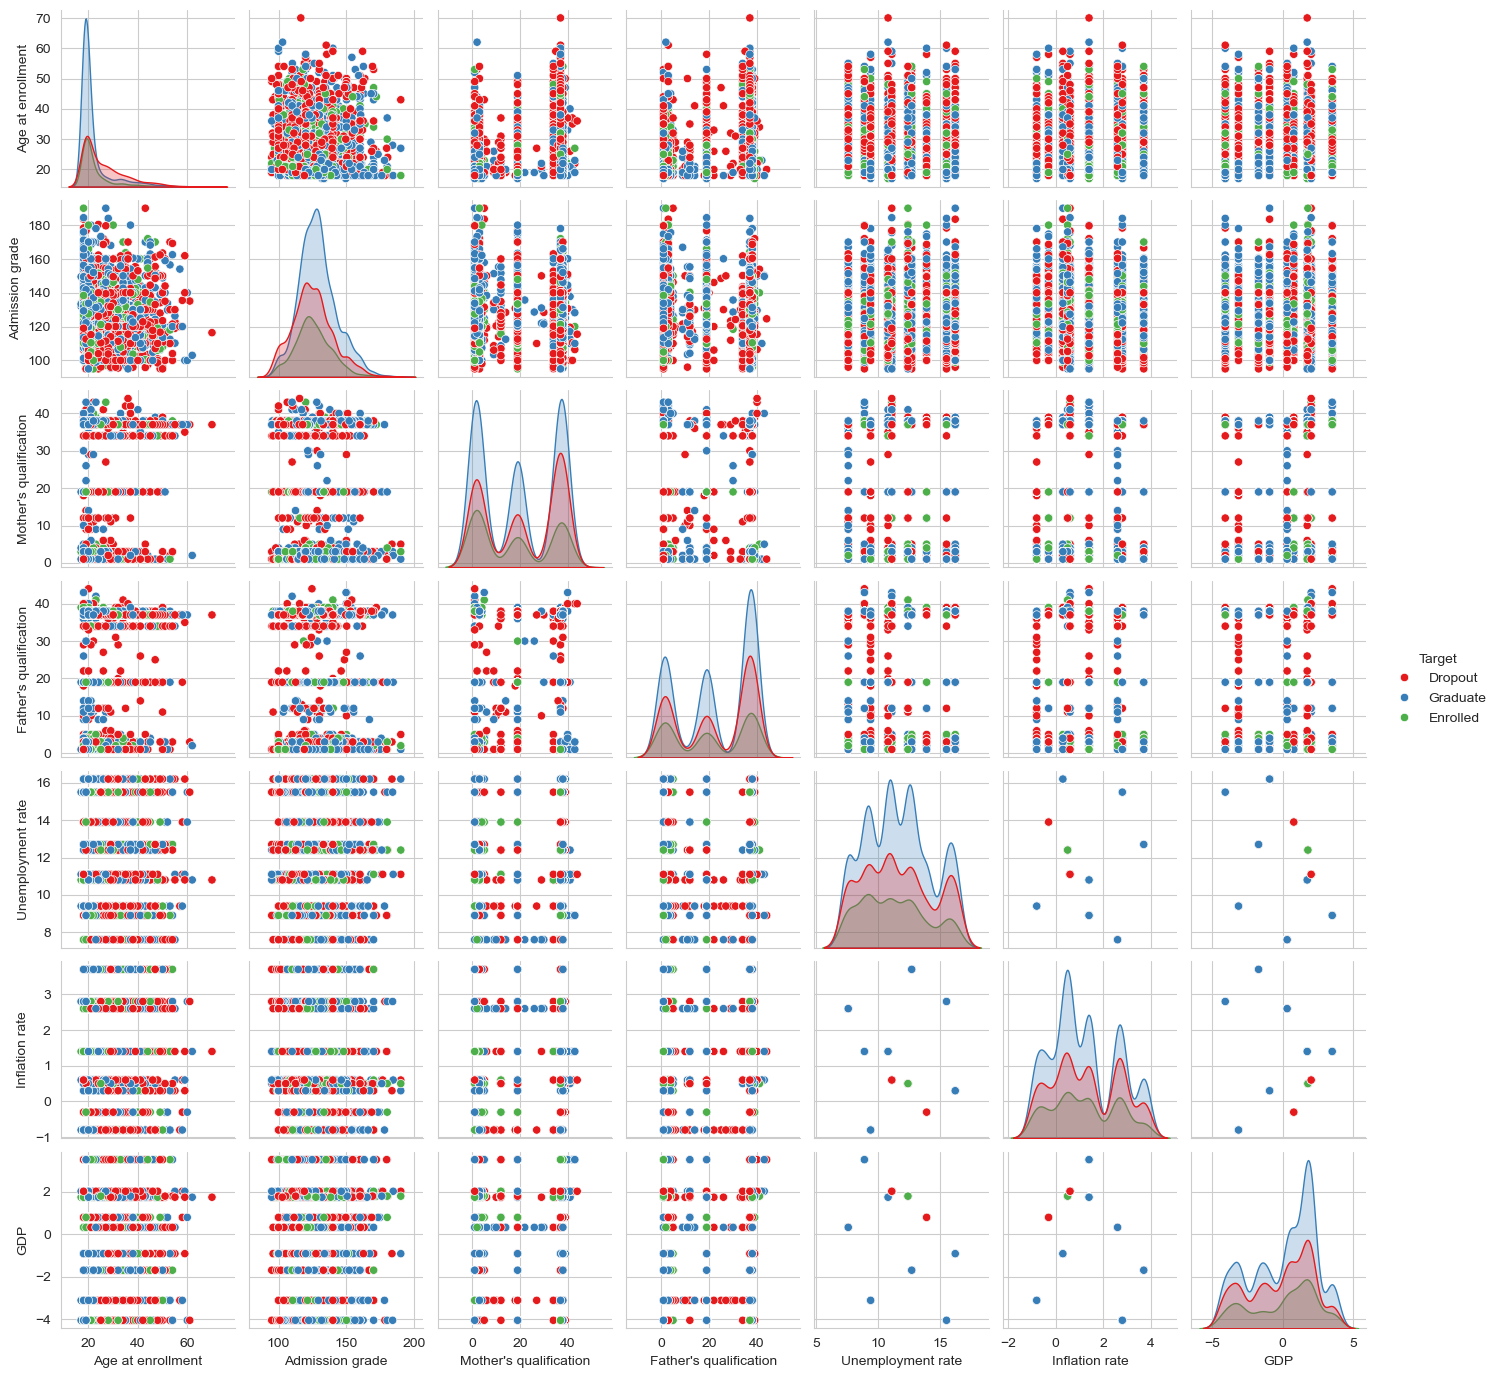

In [10]:
features = ['Age at enrollment', 'Admission grade', 'Mother\'s qualification', 'Father\'s qualification', 'Unemployment rate', 'Inflation rate','GDP']

sns.pairplot(df[features + ['Target']], hue='Target', palette='Set1', height=2)

plt.show()

In [11]:
data = df['Target'].value_counts().reset_index()
data.columns = ['Target', 'count']

fig = px.bar(data, 
             x='Target', 
             y='count', 
             labels={'Target': 'Target', 'count': 'Liczba'},
             title='Liczba danych dla każdej klasy Target', 
             color='Target',
             color_discrete_sequence=['#0000FF', '#FF0000', '#008000'])

fig.update_xaxes(tickvals=[0, 1, 2], ticktext=['Graduate', 'Dropout', 'Enrolled'])

fig.show()


### Podział studentów według ich statusu akademickiego

- **Absolwenci (2209)**: Stanowią największą grupę, co wskazuje na to, że prawie połowa studentów ukończyła swoje programy studiów.
- **Osoby, które porzuciły studia (1421)**: Jest to dość liczna grupa, co sugeruje, że wielu studentów napotyka trudności, które uniemożliwiają im ukończenie studiów.
- **Studenci w trakcie nauki (794)**: Aktualnie kontynuujący swoje studia, którzy mogą zarówno ukończyć program, jak i zdecydować się na jego przerwanie w przyszłości.

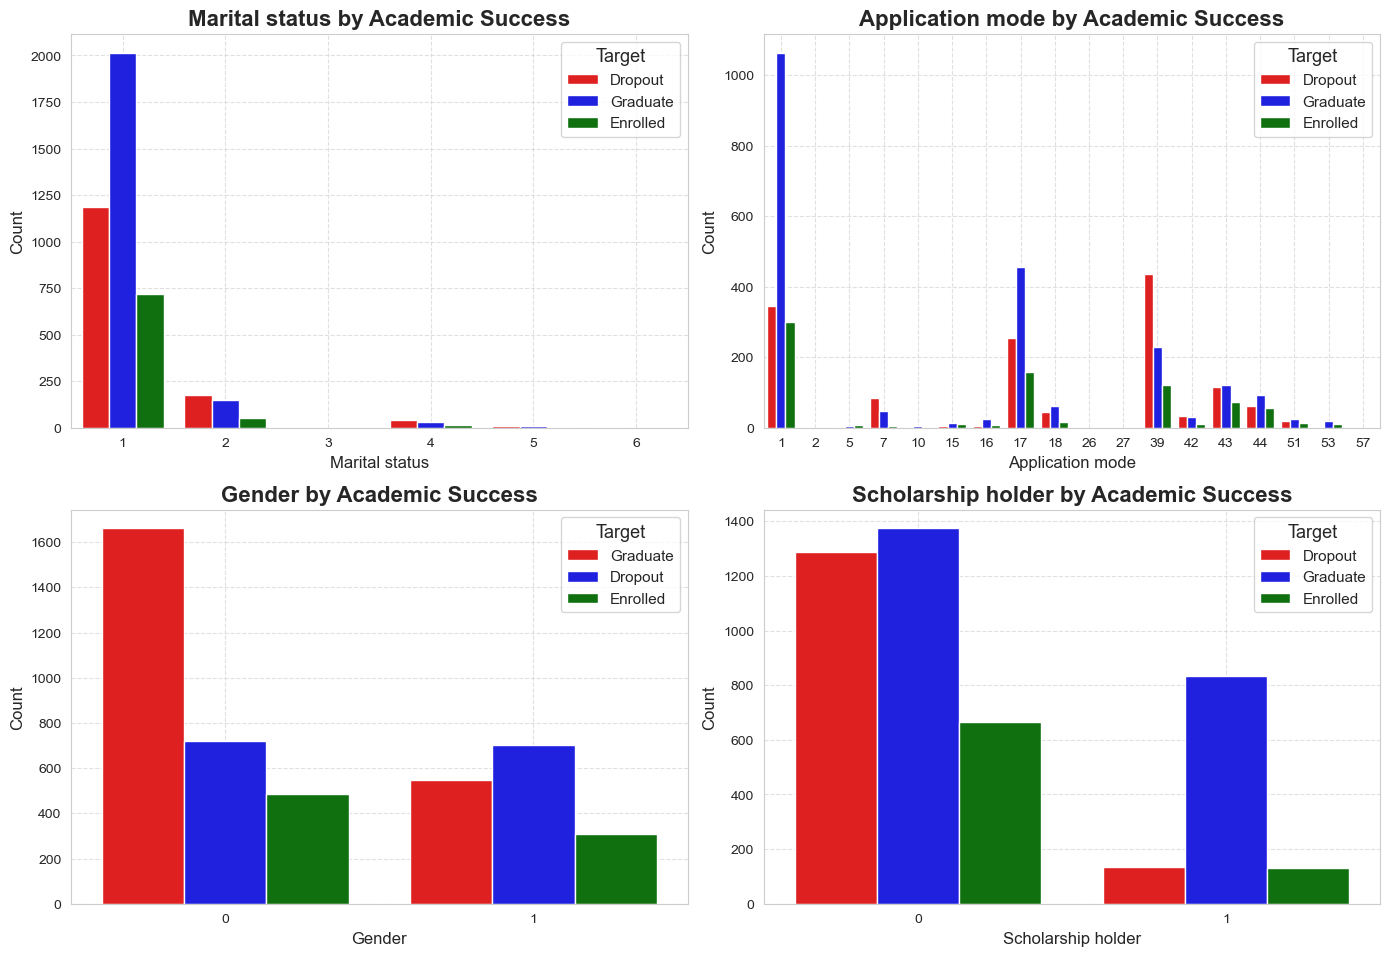

In [12]:
features = ['Marital status', 'Application mode', 'Gender', 'Scholarship holder']

plt.figure(figsize=(14, 14))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=feature, hue='Target', palette=['red', 'blue', 'green'])
    plt.title(f'{feature} by Academic Success', fontsize=16, weight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Target', title_fontsize='13', loc='upper right', fontsize=11)

    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()

plt.show()


### Podsumowanie danych na temat studentów:

- **Status cywilny**: Większość studentów to osoby **single**, co może sugerować, że studia są częściej wybierane przez osoby bez zobowiązań rodzinnych.
  
- **Tryb aplikacji**: Największa część studentów aplikuje w ramach **1. fazy - kontyngent ogólny**, co wskazuje na dużą popularność ogólnej rekrutacji.

- **Płeć**: Przeważającą grupą są **kobiety**, co może wskazywać na większe zainteresowanie studiami wśród kobiet w danym zestawie danych.

- **Stypendia**: Większość studentów **nie posiada stypendium**, co może sugerować, że część studentów finansuje swoje studia samodzielnie.

### Dział 3
3.a Czyszczenie danych

### Brakujące dane:

Źródło danych podaje, że w zestawie danych **nie występują brakujące dane**. Oznacza to, że wszystkie kolumny zawierają pełne informacje.

3.b Wybór cech 3.c Przekształcenia danych

In [13]:
columns_to_normalize = [
    'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]

df_normalized = df.copy()

scaler = MinMaxScaler()
df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df_normalized[columns_to_normalize].head())

   Previous qualification (grade)  Admission grade  \
0                        0.284211         0.340000   
1                        0.684211         0.500000   
2                        0.284211         0.313684   
3                        0.284211         0.258947   
4                        0.052632         0.489474   

   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0                          0.000000                          0.000000   
1                          0.741722                          0.735897   
2                          0.000000                          0.000000   
3                          0.711447                          0.667692   
4                          0.653422                          0.700000   

   Unemployment rate  Inflation rate       GDP  
0           0.372093        0.488889  0.766182  
1           0.732558        0.111111  0.640687  
2           0.372093        0.488889  0.766182  
3           0.209302        0.000000  0.

### Normalizacja danych

Normalizacja została przeprowadzona, aby przekształcić wartości cech do wspólnego zakresu \([0, 1]\). Dzięki temu algorytmy uczenia maszynowego, szczególnie wrażliwe na różnice w skali cech.

Normalizowane cechy obejmowały m.in.:
- **Oceny i kwalifikacje**: `Previous qualification (grade)`, `Admission grade`,
- **Cechy związane z ocenami semestralnymi**: `Curricular units 1st sem (grade)`, `Curricular units 2nd sem (grade)`,
- **Wskaźniki ekonomiczne**: `Unemployment rate`, `Inflation rate`, `GDP`.

Dzięki normalizacji dane są gotowe do trenowania modeli bez ryzyka dominacji cech o większych wartościach.

### Dział 4
4.a Podział zbioru danych 

In [14]:
X = df.drop(columns=['Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)


### Podział zbioru danych

Dane zostały podzielone na zbiór treningowy (80% danych) i testowy (20% danych). Taki podział jest zalecany w źródle danych, ponieważ umożliwia:
1. Trenowanie modeli na większości danych, co pozwala na uzyskanie lepszych wyników.
2. Testowanie modeli na niezależnym zbiorze, co umożliwia ocenę ich skuteczności na nowych, niewidzianych wcześniej danych.

Podczas podziału danych zastosowano opcję `stratify=y`, aby zachować proporcje klas w zbiorach treningowym i testowym.


4.b Wskazanie wykorzystanych metod i alogrytmów

In [15]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "Logistic Regression": LogisticRegression(C=1.0, random_state=42)
}

4.c Przedstawienie wyników oraz porównanie algorytmów

In [16]:
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=False)

    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 50)


Model: Random Forest
Accuracy: 0.7831
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.74      0.79       284
    Enrolled       0.64      0.38      0.47       159
    Graduate       0.78      0.95      0.86       442

    accuracy                           0.78       885
   macro avg       0.75      0.69      0.71       885
weighted avg       0.77      0.78      0.77       885

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.6712
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.62      0.68       284
    Enrolled       0.41      0.06      0.10       159
    Graduate       0.65      0.92      0.76       442

    accuracy                           0.67       885
   macro avg       0.60      0.53      0.51       885
weighted avg       0.64      0.67      0.62       885

--------------------------------------------------


4.d Przedstawienie wyników klasyfikacji

In [17]:
example_index = 5
example_features = X_test.iloc[example_index]
actual_label = y_test.iloc[example_index]

predicted_labels = {model_name: model.predict([example_features])[0] for model_name, model in models.items()}

print("Przykładowa klasyfikacja:")
print(f"Rzeczywista klasa: {actual_label}")
for model_name, predicted_label in predicted_labels.items():
    print(f"Model {model_name}: Przewidziana klasa: {predicted_label}")


Przykładowa klasyfikacja:
Rzeczywista klasa: Graduate
Model Random Forest: Przewidziana klasa: Graduate
Model Logistic Regression: Przewidziana klasa: Graduate


In [15]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "Logistic Regression": LogisticRegression(C=1.0, random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=False)

    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("-" * 50)

example_index = 5
example_features = X_test.iloc[example_index]
actual_label = y_test.iloc[example_index]
predicted_labels = {model_name: model.predict([example_features])[0] for model_name, model in models.items()}

print("Przykładowa klasyfikacja:")
print(f"Rzeczywista klasa: {actual_label}")
for model_name, predicted_label in predicted_labels.items():
    print(f"Model {model_name}: Przewidziana klasa: {predicted_label}")


Model: Random Forest
Accuracy: 0.7831
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.74      0.79       284
    Enrolled       0.64      0.38      0.47       159
    Graduate       0.78      0.95      0.86       442

    accuracy                           0.78       885
   macro avg       0.75      0.69      0.71       885
weighted avg       0.77      0.78      0.77       885

--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.6712
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.74      0.62      0.68       284
    Enrolled       0.41      0.06      0.10       159
    Graduate       0.65      0.92      0.76       442

    accuracy                           0.67       885
   macro avg       0.60      0.53      0.51       885
weighted avg       0.64      0.67      0.62       885

--------------------------------------------------
Przykład

### Wyniki modeli

#### **Random Forest**
- **Accuracy: 78.31%**  
  Model poprawnie klasyfikuje około 78% przypadków. 
- **F1-Score**:
  - **Graduate**: Najlepsza skuteczność (F1-Score 0.86), co wskazuje, że model dobrze radzi sobie z przewidywaniem tej klasy.
  - **Enrolled**: Najsłabsza skuteczność (F1-Score 0.47), model ma trudności z poprawnym rozpoznaniem tej klasy.
  - **Dropout**: Osiąga umiarkowaną skuteczność (F1-Score 0.79).
- **Makro średnia (macro avg)**:  
  Nierówna skuteczność między klasami (średni F1-Score wynosi 0.71).
- **Ważona średnia (weighted avg)**:  
  Wynosi 0.77, co uwzględnia nierówny rozkład klas w danych.

#### **Logistic Regression**
- **Accuracy: 67.12%**  
  Model poprawnie klasyfikuje około 67% przypadków.
- **F1-Score**:
  - **Graduate**: Najlepsza skuteczność (F1-Score 0.76), model dobrze przewiduje tę klasę.
  - **Dropout**: Osiąga umiarkowaną skuteczność (F1-Score 0.68).
  - **Enrolled**: Najsłabsza skuteczność (F1-Score 0.10), model ma duże trudności z rozpoznaniem tej klasy.
- **Makro średnia (macro avg)**:  
  Średni F1-Score wynosi 0.51, co pokazuje dużą nierówność w skuteczności między klasami.
- **Ważona średnia (weighted avg)**:  
  Wynosi 0.62, co jest gorszym wynikiem w porównaniu do Random Forest.

#### **Przykładowa klasyfikacja**
- **Rzeczywista klasa**: „Graduate”.
- **Random Forest**: Przewidziana klasa: „Graduate”.
- **Logistic Regression**: Przewidziana klasa: „Graduate”.

#### **Podsumowanie**
- **Random Forest** działa znacznie lepiej niż Logistic Regression, osiągając wyższą dokładność i lepsze F1-Score, szczególnie dla klasy „Enrolled”.
- Logistic Regression ma trudności z klasyfikacją klasy „Enrolled” (F1-Score 0.10) oraz osiąga niższą ogólną skuteczność.
---


### Dział 5

### Wnioski z projektu

#### Cel projektu
Celem projektu było przewidywanie wyników akademickich studentów na podstawie ich danych demograficznych, akademickich oraz społeczno-ekonomicznych. Analiza miała na celu podział studentów na trzy kategorie:  
1. **Dropout (Porzucenie studiów)** – studenci, którzy przerwali naukę.  
2. **Enrolled (Kontynuowanie nauki)** – studenci, którzy pozostali na studiach, ale jeszcze ich nie ukończyli.  
3. **Graduate (Ukończenie studiów)** – studenci, którzy ukończyli naukę w przewidywanym czasie.  

#### Wyniki analizy modeli
1. **Random Forest**:
   - Osiągnął najwyższą dokładność wynoszącą **78.31%**, co wskazuje na dobrą skuteczność modelu w przewidywaniu wyników akademickich.  
   - **F1-Score**:
     - Klasa **Graduate**: Najwyższa skuteczność, **F1-Score 0.86**, co oznacza, że model skutecznie identyfikuje studentów, którzy ukończyli studia.  
     - Klasa **Dropout**: Umiarkowana skuteczność, **F1-Score 0.79**.  
     - Klasa **Enrolled**: Najsłabsza skuteczność, **F1-Score 0.47**, co może wynikać z niewystarczającej liczby przykładów tej klasy w danych.  
   - Średnia skuteczność:  
     - **Macro avg (średnia arytmetyczna dla klas)**: **F1-Score 0.71** (nierówna skuteczność między klasami).  
     - **Weighted avg (ważona średnia uwzględniająca rozkład klas)**: **F1-Score 0.77**.

2. **Logistic Regression**:
   - Osiągnął niższą dokładność wynoszącą **67.12%**, co oznacza, że model poprawnie klasyfikował mniej przypadków niż Random Forest.  
   - **F1-Score**:
     - Klasa **Graduate**: Umiarkowana skuteczność, **F1-Score 0.76**.  
     - Klasa **Dropout**: Umiarkowana skuteczność, **F1-Score 0.68**.  
     - Klasa **Enrolled**: Bardzo niska skuteczność, **F1-Score 0.10**, co sugeruje, że model miał trudności z rozpoznaniem tej klasy.  
   - Średnia skuteczność:  
     - **Macro avg (średnia arytmetyczna dla klas)**: **F1-Score 0.51** (duża nierówność w skuteczności między klasami).  
     - **Weighted avg (ważona średnia uwzględniająca rozkład klas)**: **F1-Score 0.62**.

#### Kluczowe obserwacje
- **Random Forest** przewyższył Logistic Regression pod względem dokładności i skuteczności w każdej z kategorii.  
- Oba modele miały trudności z klasyfikacją klasy **Enrolled**, co może wynikać z nierównowagi w danych (klasa ta miała najmniej przykładów).  
- Logistic Regression wykazał większą podatność na nierównowagę klas i liniowość danych, co mogło wpłynąć na jego gorsze wyniki.  

#### Podsumowanie
   **Random Forest** był najskuteczniejszym modelem w tym projekcie i może być używany jako bazowy model do przewidywania wyników akademickich studentów.  
